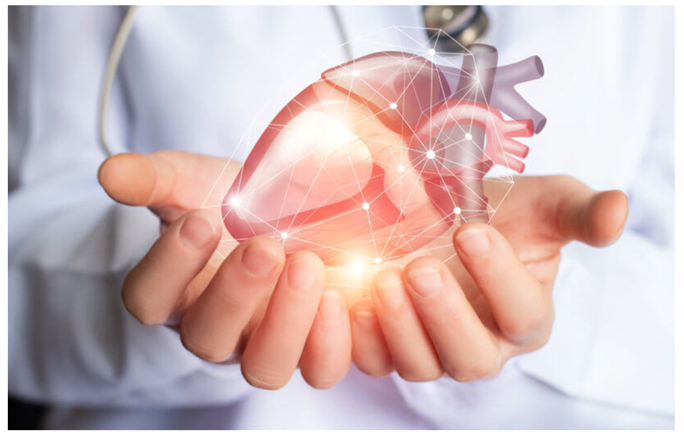

**This juyter file is based on heart disease classification using Logistic Regression of statsmodel.api**

# `Importing modules`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# `Reading the dataset`

_Reading the csv file_

In [2]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<u>**Details of the data:**
* **age** - _age in years_
* **sex** - _(1 = male; 0 = female)_
* **cp** - _chest pain type_ 
* **trestbps** - _resting blood pressure (in mm Hg on admission to the hospital)_
* **chol** - _serum cholestoral in mg/dl_
* **fbs** - _(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)_
* **restecg** - _resting electrocardiographic results_
* **thalach** - _maximum heart rate achieved_
* **exang** - _exercise induced angina (1 = yes; 0 = no)_
* **oldpeak** - _ST depression induced by exercise relative to rest_
* **slope** - _the slope of the peak exercise ST segment_
* **ca** - _number of major vessels (0-3) colored by flourosopy_
* **thal** - _3 = normal; 6 = fixed defect; 7 = reversable defect_
* **target** - _have disease or not (1=yes, 0=no)_

_No. of rows and columns present_

In [3]:
data.shape

(1025, 14)

_Columns Present in the data_

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

_Summary of the data_

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


_Unique data in each column_

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

_unique value present in the column sex_

In [7]:
data.sex.unique()

array([1, 0], dtype=int64)

_unique value present in the column cp_

In [8]:
data.cp.unique()

array([0, 1, 2, 3], dtype=int64)

_unique value present in the column fbs_

In [9]:
data.fbs.unique()

array([0, 1], dtype=int64)

_unique value present in the column restecg_

In [10]:
data.restecg.unique()

array([1, 0, 2], dtype=int64)

_unique value present in the column exang_

In [11]:
data.exang.unique()

array([0, 1], dtype=int64)

_unique value present in the column slope_

In [12]:
data.slope.unique()

array([2, 0, 1], dtype=int64)

_unique value present in the column ca_

In [13]:
data.ca.unique()

array([2, 0, 1, 3, 4], dtype=int64)

_unique value present in the column thal_

In [14]:
data.thal.unique()

array([3, 2, 1, 0], dtype=int64)

_unique value present in the column target_

In [15]:
data.target.unique()

array([0, 1], dtype=int64)

_Description of the data_

In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


_Total no. of null values present in each column_

In [17]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

_Total no. of duplicate values present in the data_

In [18]:
data.duplicated().sum()

723

_Removing all duplicate values present in the data_

In [19]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [20]:
data=data.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


# `Data Visualization`

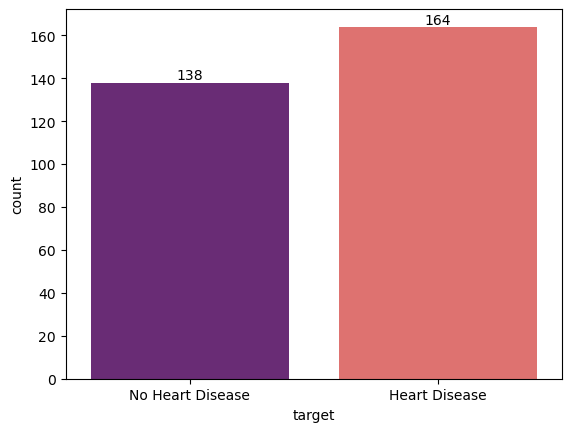

In [21]:
ax=sns.countplot(data=data,x='target',palette='magma')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.show()

> _Above plot shows the count of patients having Heart Disease or not. Patients with no heart disease are 138 in total and patients sufferring from heart disease are 164 in total._

In [22]:
sex=pd.crosstab(data.sex,data.target)
sex

target,0,1
sex,,
0,24,72
1,114,92


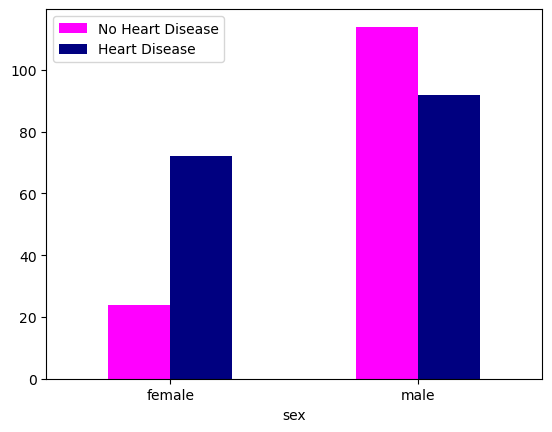

In [23]:
sex.plot(kind="bar",color=['magenta','navy'])
plt.xticks([0,1],['female','male'],rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frequency of each sex whether they are suffering from the diseaase or not. Female patients with no heart disease are 24 and suffering from heart disease are 72. Male patients with no heart disease are 114 and suffering from heart disease are 92._

In [24]:
Age=pd.crosstab(data.age,data.target)
Age

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1
39,1,3
40,2,1
41,1,9
42,1,7


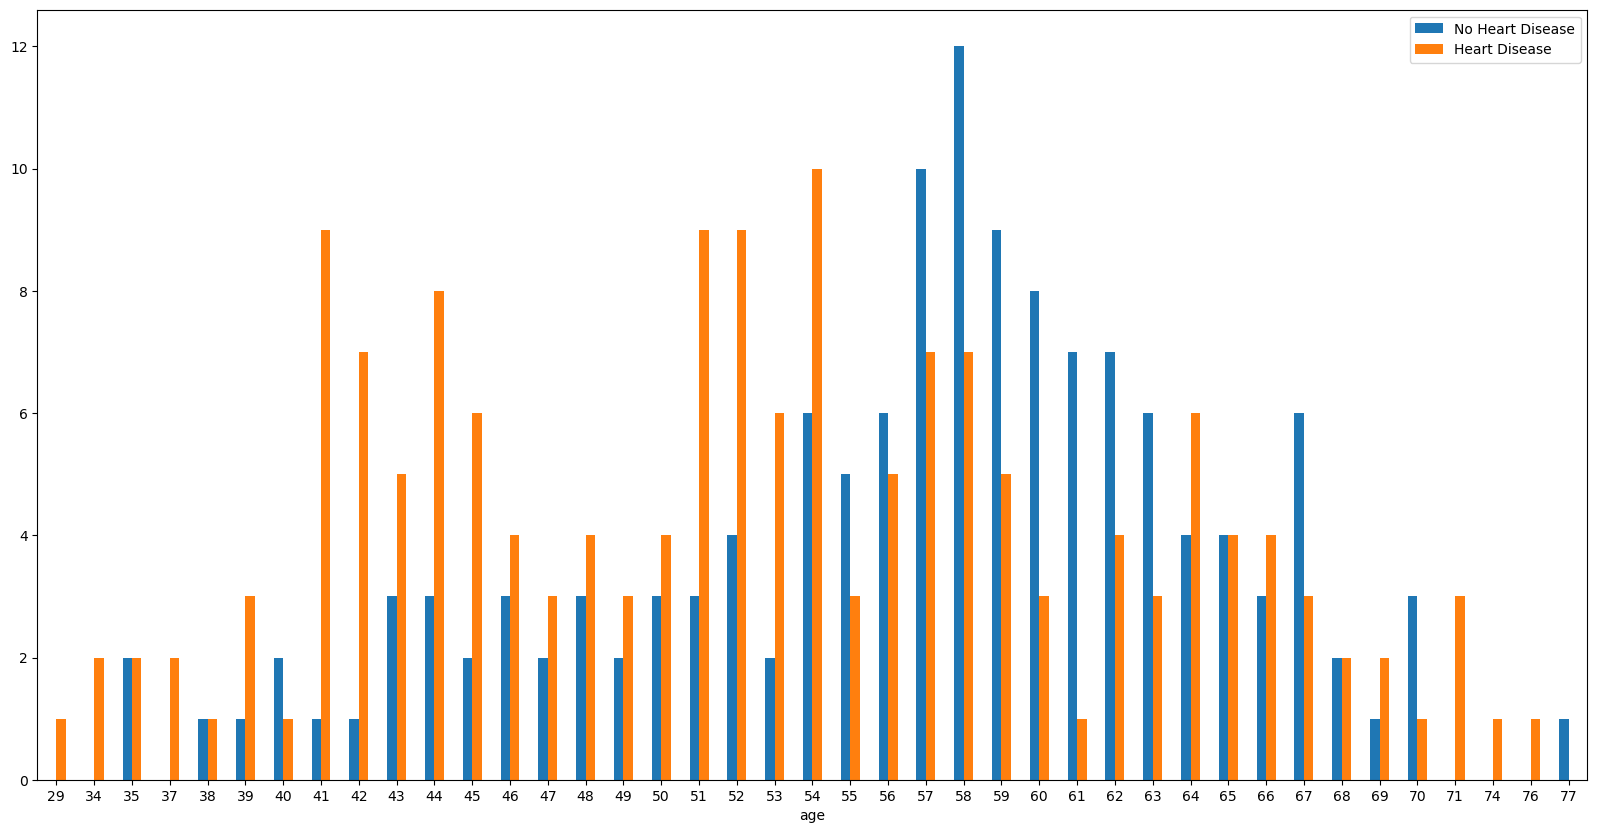

In [25]:
Age.plot(kind="bar",figsize=(20,10))
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frequency of patients having heart disease or not according to age._

In [26]:
FBS=pd.crosstab(data.fbs,data.target)
FBS

target,0,1
fbs,,
0,116,141
1,22,23


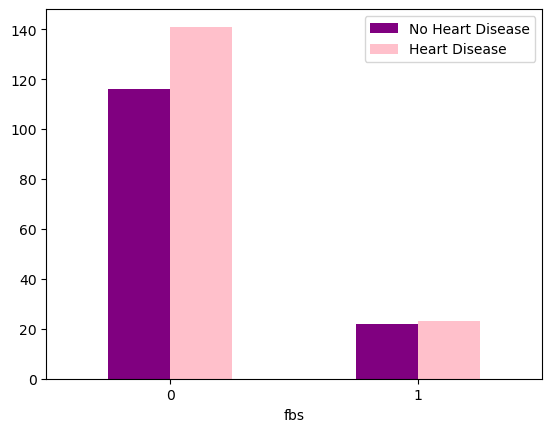

In [27]:
FBS.plot(kind="bar",color=['purple','pink'])
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frequency of patients having heart disease or not according to fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)._

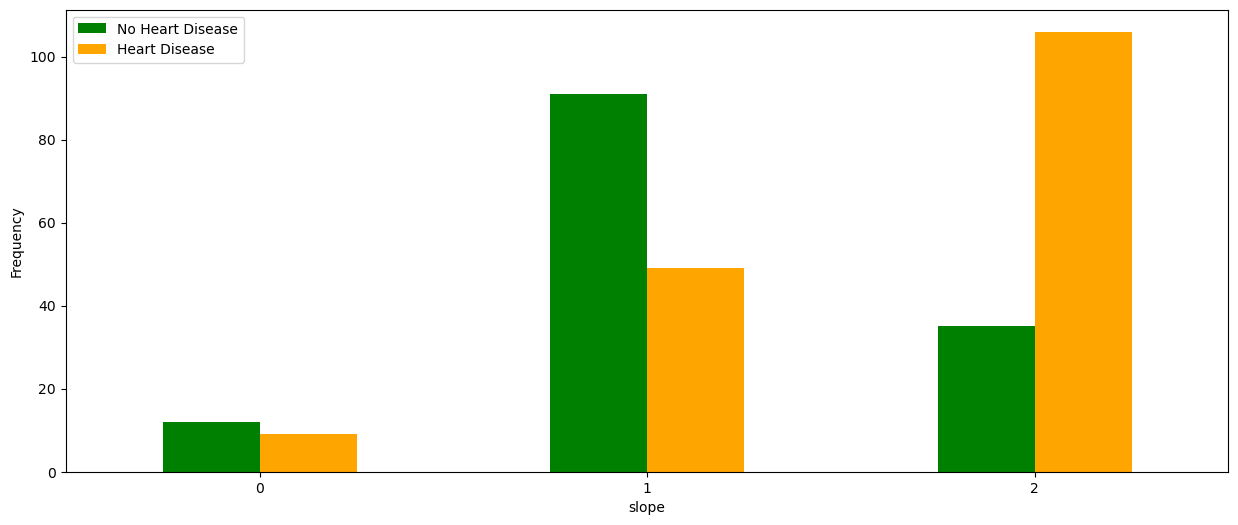

In [28]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['green','orange' ])
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

> _Above plot shows the frquency of patients having heart disease or not according to slope of the peak exercise ST segment_

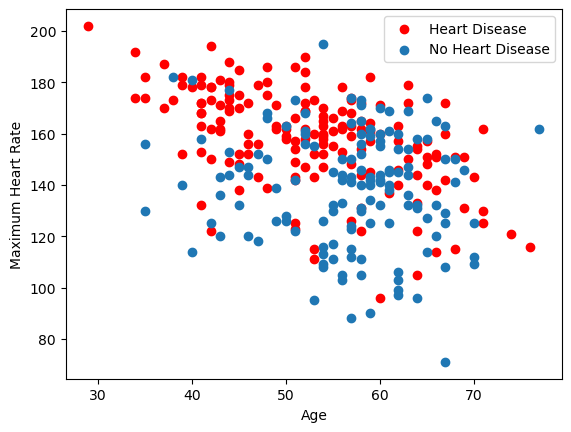

In [29]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

> _Above plot shows the maximum heart rate of individual age based on whether they are suffering from heart disease or not._

# `Data Preprocessing`

* ### Creating Dummy Variables

_Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables._

In [30]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [31]:
data = pd.concat([data, a, b, c], axis = 1)

In [32]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,0,115,0,1.5,0,...,0,1,0,0,0,1,0,0,1,0
733,44,0,108,141,0,1,175,0,0.6,0,...,0,1,0,0,0,1,0,0,1,0
739,52,1,128,255,0,1,161,1,0.0,1,...,0,0,0,0,0,0,1,0,0,1
843,59,1,160,273,0,0,125,0,0.0,0,...,0,0,1,0,0,1,0,0,0,1


# `Train Test Split`

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=data.drop('target',axis=1)
y=data.target

In [35]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=20)

In [37]:
X_train

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
113,0.583333,1.0,0.150943,0.477169,0.0,0.5,0.549618,1.0,0.483871,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
80,0.437500,1.0,0.433962,0.244292,0.0,0.5,0.702290,0.0,0.096774,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
151,0.520833,1.0,0.924528,0.358447,0.0,0.0,0.946565,0.0,0.000000,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
65,0.625000,1.0,0.716981,0.369863,0.0,0.0,0.671756,0.0,0.032258,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.479167,1.0,0.415094,0.221461,0.0,0.5,0.748092,0.0,0.000000,1.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.708333,1.0,0.433962,0.139269,0.0,0.0,0.557252,1.0,0.645161,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
566,0.437500,0.0,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
328,0.854167,1.0,0.339623,0.447489,0.0,0.0,0.290076,0.0,0.387097,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
337,0.520833,1.0,0.292453,0.335616,0.0,0.0,0.618321,0.0,0.080645,0.25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
y_train

113    0
80     0
151    0
65     0
128    1
      ..
77     0
566    1
328    0
337    1
528    1
Name: target, Length: 211, dtype: int64

# `Logistic Regression Model`

In [39]:
import statsmodels.api as sm
from sklearn.metrics  import f1_score,accuracy_score

In [40]:
model=sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.339178
         Iterations 8


In [41]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                           18
Date:                Fri, 19 May 2023   Pseudo R-squ.:                  0.5100
Time:                        12:21:47   Log-Likelihood:                -71.567
converged:                       True   LL-Null:                       -146.06
Covariance Type:            nonrobust   LLR p-value:                 1.167e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.6073      1.359     -1.182      0.237      -4.272       1.057
sex           -1.2637      0.620     -2.039      0.041      -2.478      -0.049
trestbps      -2.2330      1.415     -1.578      0.1

In [42]:
pred=model.predict(X_test)
pred

334    0.005133
143    0.980385
304    0.978892
88     0.344335
29     0.109847
         ...   
628    0.680824
216    0.013535
181    0.514560
339    0.066208
19     0.942187
Length: 91, dtype: float64

In [43]:
y_test

334    0
143    1
304    1
88     0
29     0
      ..
628    1
216    0
181    1
339    0
19     1
Name: target, Length: 91, dtype: int64

In [44]:
print(accuracy_score(y_test,round(pred)))

0.8681318681318682


In [45]:
print(f1_score(y_test,round(pred)))

0.8888888888888888


> **_The accuracy score is 0.86 and f1 score is 0.88 of the Logistic Regression._**

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm = confusion_matrix(y_test,round(pred)) 
cm

array([[31,  6],
       [ 6, 48]], dtype=int64)

In [48]:
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

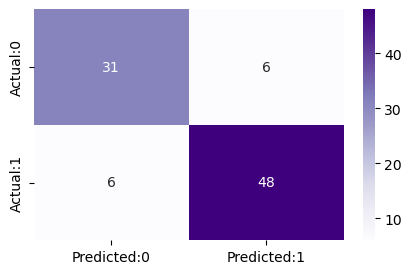

In [49]:
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

> **_The above shows the confusion matrix of the model._**
>
> **_True Negative : 31_**
>
> **_True Positive : 48_**
>
> **_False Negative : 6_**
>
> **_False Positive : 6_**